In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('single_genre_artists.csv')
df

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.1840,4,...,0.993,0.000016,0.3250,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.1800,10,...,0.989,0.000000,0.1280,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.2060,0,...,0.995,0.000000,0.4180,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.4670,9,...,0.991,0.000000,0.2190,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.2980,9,...,0.991,0.000000,0.3730,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.116,0.000000,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56
95833,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.143,0.000000,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36
95834,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.996,0.973000,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52
95835,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.996,0.961000,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [3]:
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop(columns=['id_songs','id_artists','release_date','name_artists'],inplace=True)

In [6]:
df["duration_min"] = df["duration_ms"] / 60000.0

In [7]:
features = [
    "danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","duration_min"
]

x=df[features].copy()


### Histogram

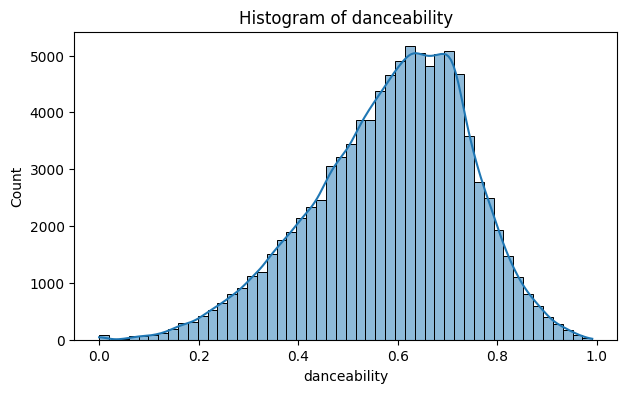

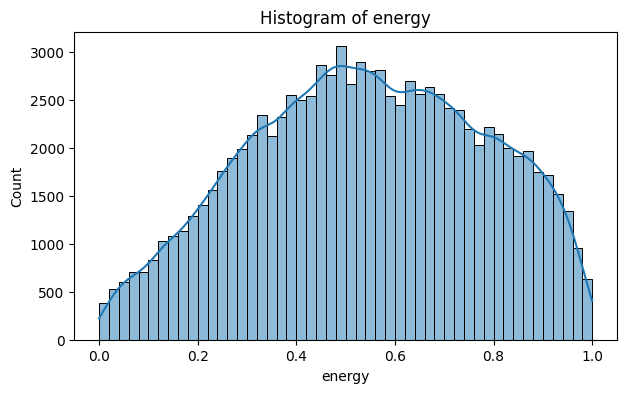

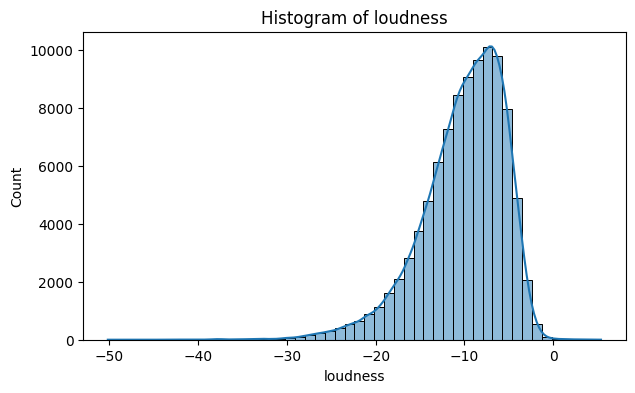

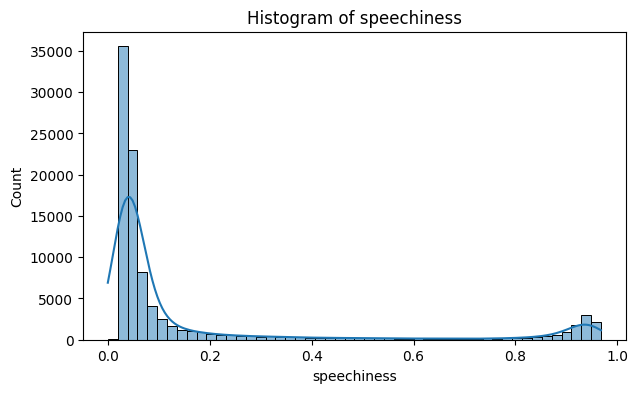

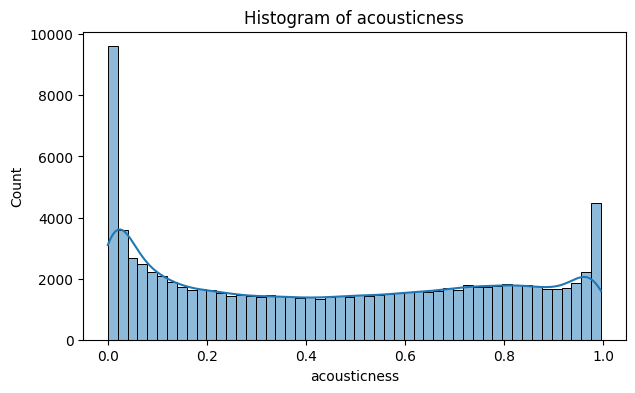

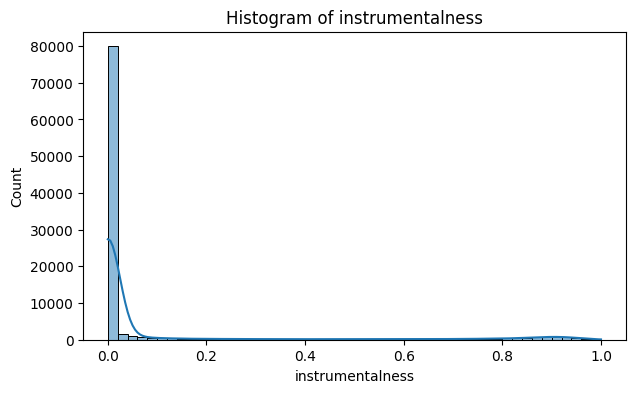

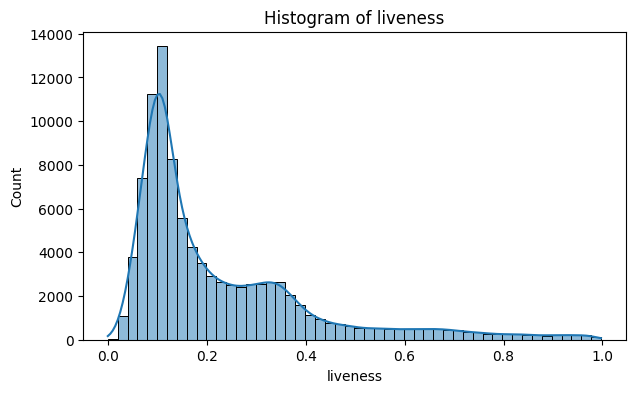

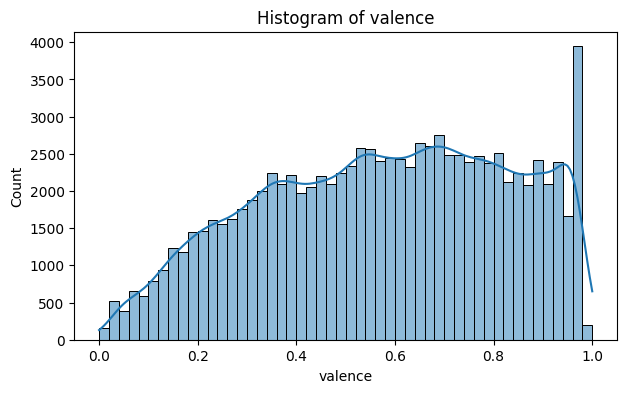

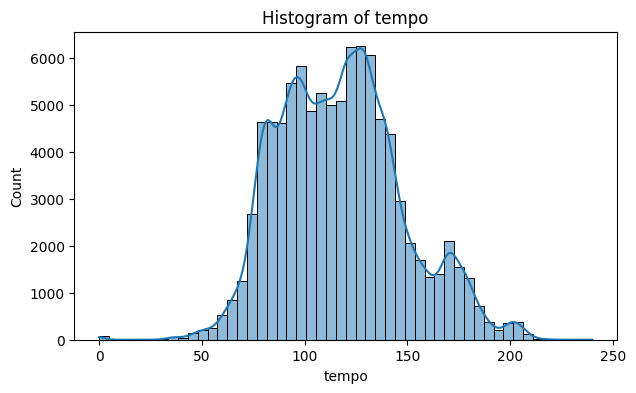

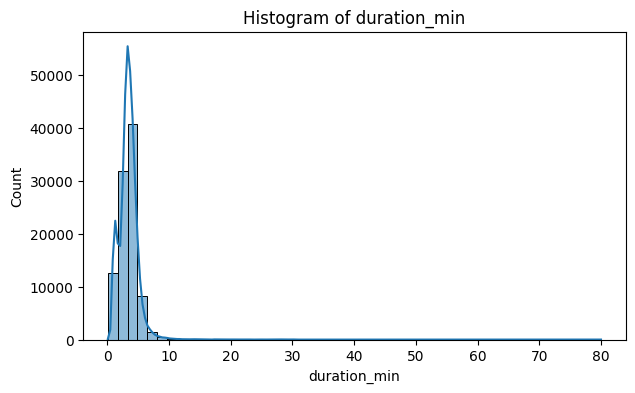

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col],bins=50,kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


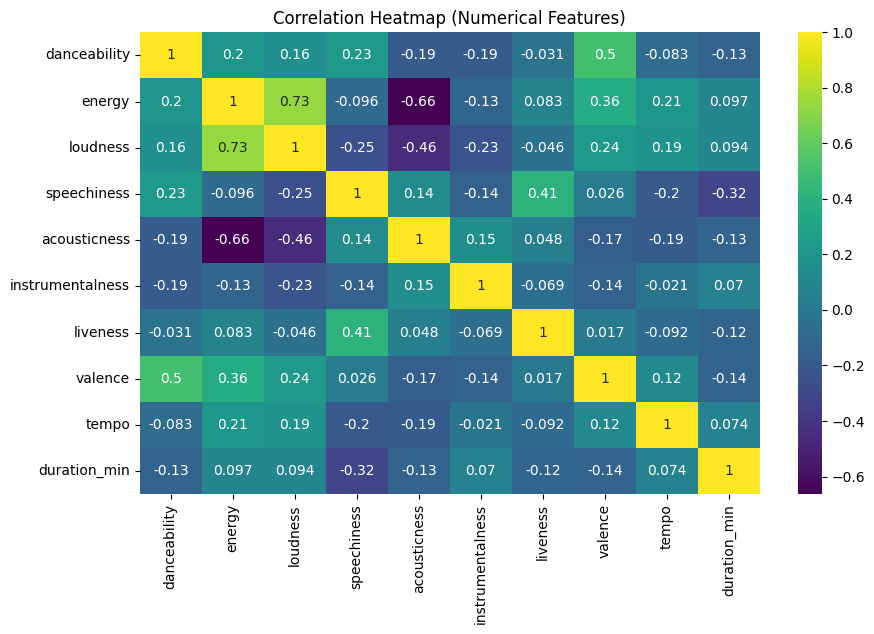

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

#### Preprocessing using StandardScalar()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [11]:
x_scaled

array([[-0.15347598, -1.51112816, -0.75790895, ...,  0.32128698,
         0.51500516, -0.40173462],
       [-1.02851842, -1.52805562, -1.09862851, ..., -0.57745518,
        -1.2944868 ,  0.12490637],
       [-0.48805103, -1.41802711, -1.12789922, ..., -0.37594348,
        -1.56000306, -0.00394925],
       ...,
       [ 0.14249425, -2.21700341, -3.87787243, ...,  1.27242218,
        -1.62041993, -1.07201656],
       [-0.15991012, -2.14971674, -3.24149759, ..., -0.7588157 ,
        -1.78348586, -0.19941949],
       [-0.17277839, -0.09768491,  0.56580125, ..., -1.46410663,
         0.47552221,  0.4206722 ]], shape=(95837, 10))

#### PCA Implementation

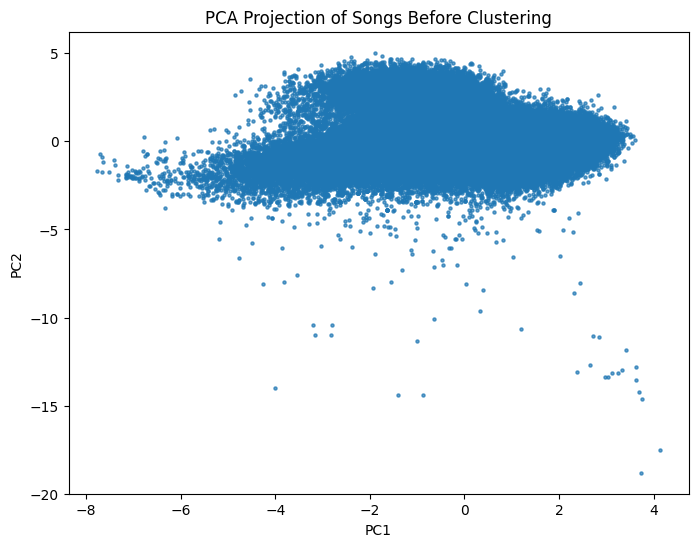

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2,random_state=42)
X_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],s=5, alpha=0.7) # s is the size of points
plt.title('PCA Projection of Songs Before Clustering')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


#### Clustering Implementation

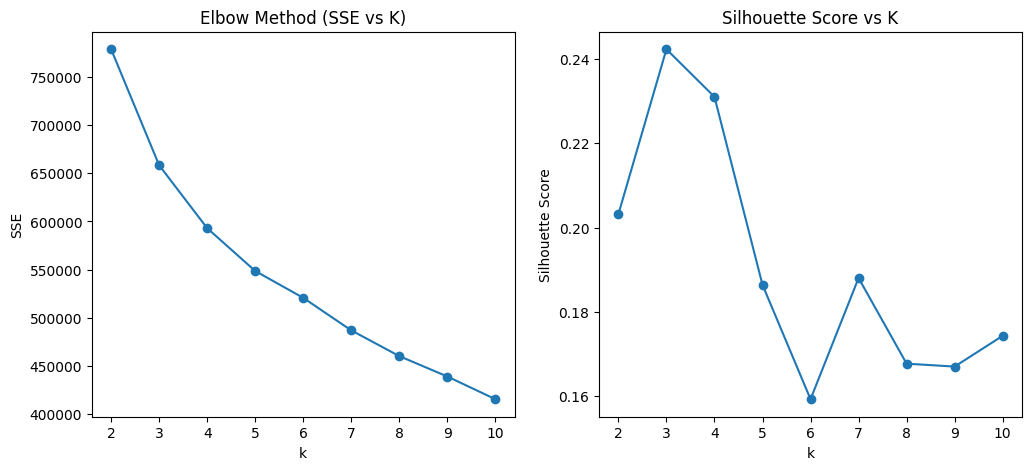

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse=[] # Sum of squared distances to closest cluster center [the lower the sse value the better the model and we chose that k value]
silhouette_scores = [] # Silhouette scores for each k
k_values = range(2, 11)

for k in k_values:
    model = KMeans(n_clusters=k,random_state=42,n_init=10) # n_init specifies the number of times the k-means algorithm will be run with different centroid seeds
    model.fit(x_scaled)
    sse.append(model.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, model.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values,sse,'-o')
plt.title("Elbow Method (SSE vs K)")
plt.xlabel("k")
plt.ylabel("SSE")

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, '-o')
plt.title("Silhouette Score vs K")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.show()



In [14]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score
final_k=3
results=[]

def evaluate_clustering(X,label,algo_name):
    n_clusters = len(set(label)) - (1 if -1 in label else 0)
    if n_clusters <=1:
        return{
            "Algorithm": algo_name,
            "Num_Clusters": n_clusters,
            "Silhouette_Score": None,
            "Davies_Bouldin_Score": None
        }
    return{
        "Algorithm": algo_name,
        "Num_Clusters": n_clusters,
        "Silhouette_Score": round(silhouette_score(X, label),3),
        "Davies_Bouldin_Score": round(davies_bouldin_score(X, label),3)
    }

KMeans_model = KMeans(n_clusters=final_k,random_state=42,n_init=20)
labels_kmeans = KMeans_model.fit_predict(x_scaled)
results.append(evaluate_clustering(x_scaled,labels_kmeans,f"Kmeans (k={final_k})"))

DBscan_model = DBSCAN(eps=1.5,min_samples=10,n_jobs=-1)
labels_dbscan = DBscan_model.fit_predict(x_scaled)
results.append(evaluate_clustering(x_scaled,labels_dbscan,f"DBSCAN (eps=1.5, min_samples=10)"))


sample_idx = np.random.choice(len(x_scaled),size = min(20000,len(x_scaled)),replace=False)
sample_x = x_scaled[sample_idx]
Agglomerative_model = AgglomerativeClustering(n_clusters=final_k)
labels_agglomerative = Agglomerative_model.fit_predict(sample_x)
results.append(evaluate_clustering(sample_x,labels_agglomerative,f"Agglomerative (k={final_k})"))

results_df = pd.DataFrame(results)
print("\n=== Clustering Comparison Results (Full Dataset, No Time) ===")
print(results_df)

df['cluster'] = labels_kmeans
df.to_csv("amazon_music_clusters_full_k3.csv", index=False)
print("\n✅ Cluster labels added to dataframe and saved as 'amazon_music_clusters_full_k3.csv'")



=== Clustering Comparison Results (Full Dataset, No Time) ===
                          Algorithm  Num_Clusters  Silhouette_Score  \
0                      Kmeans (k=3)             3             0.242   
1  DBSCAN (eps=1.5, min_samples=10)             4             0.242   
2               Agglomerative (k=3)             3             0.218   

   Davies_Bouldin_Score  
0                 1.571  
1                 1.665  
2                 1.825  

✅ Cluster labels added to dataframe and saved as 'amazon_music_clusters_full_k3.csv'



=== Cluster Feature Means ===
   cluster  danceability    energy   loudness  speechiness  acousticness  \
0        0      0.664259  0.466618 -13.364416     0.829938      0.585916   
1        1      0.486376  0.311307 -13.203705     0.060157      0.749176   
2        2      0.627372  0.693677  -7.606166     0.075051      0.258438   

   instrumentalness  liveness   valence       tempo  duration_min  
0          0.001384  0.435523  0.584054  100.388816      1.625374  
1          0.168526  0.182115  0.413258  111.941246      3.727545  
2          0.050698  0.199842  0.666450  124.913029      3.774662  


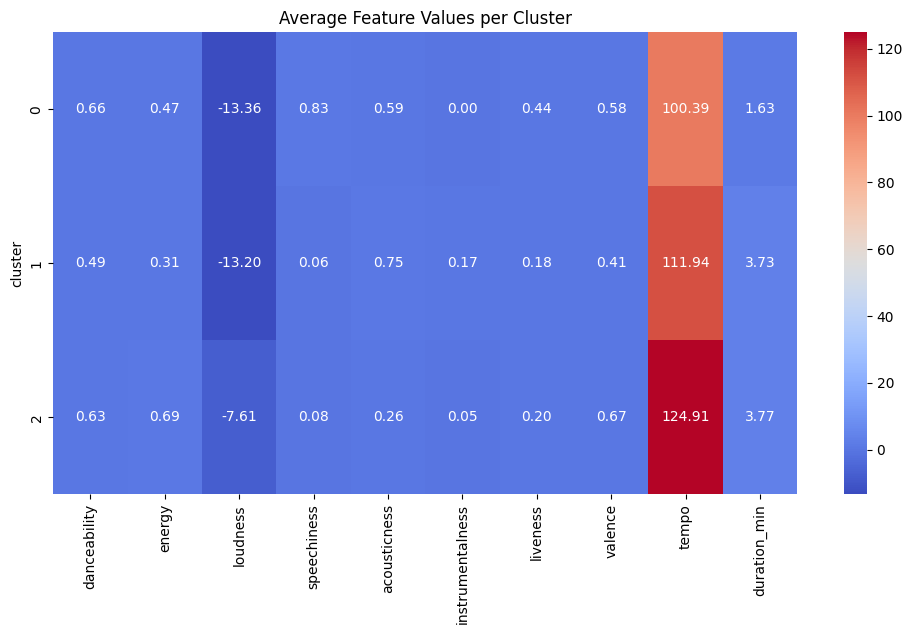

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\106347935.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


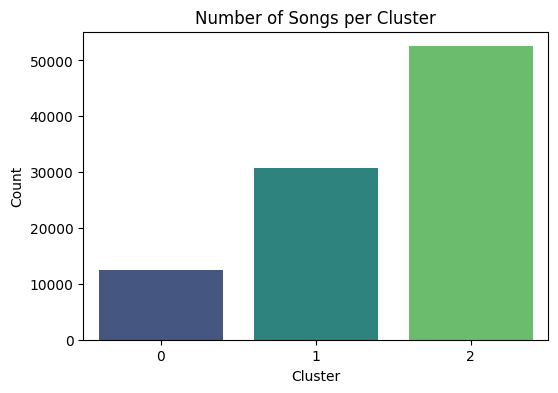


Cluster sizes:
cluster
0    12514
1    30815
2    52508
Name: count, dtype: int64


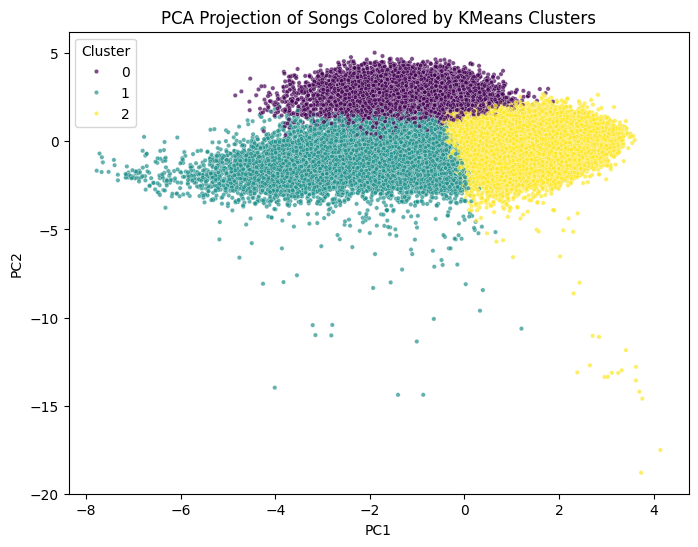


=== Cluster Interpretation Suggestions ===

Cluster 0:
   → Dominant Features: ['tempo']

Cluster 1:
   → Dominant Features: ['tempo']

Cluster 2:
   → Dominant Features: ['tempo']

✅ Cluster summary saved as 'cluster_feature_summary.csv'


In [15]:
# === Cluster Summary: Feature Means per Cluster ===
cluster_summary = df.groupby('cluster')[features].mean().reset_index()
print("\n=== Cluster Feature Means ===")
print(cluster_summary)

# === Visualize Cluster Profiles with Heatmap ===
plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary.set_index('cluster'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Average Feature Values per Cluster")
plt.show()

# === Cluster Sizes ===
cluster_counts = df['cluster'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title("Number of Songs per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

print("\nCluster sizes:")
print(cluster_counts)


# === PCA Visualization of Clusters ===
pca = PCA(n_components=2,random_state=42)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=df['cluster'],palette='viridis',s=10,alpha=0.7) # hue is for color by cluster labels
plt.title("PCA Projection of Songs Colored by KMeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster',loc='best')
plt.show()

# ===  Interpret Cluster Characteristics ===
print("\n=== Cluster Interpretation Suggestions ===")
for c in cluster_summary['cluster']:
    print(f"\nCluster {c}:")
    top_features = cluster_summary.loc[cluster_summary['cluster']==c, features].T
    top_features = top_features[top_features[c] > top_features[c].mean()].sort_values(by=c, ascending=False)
    print("   → Dominant Features:", list(top_features.index[:3]))

# === Save Cluster Profiles for Report ===
cluster_summary.to_csv("cluster_feature_summary.csv", index=False)
print("\n✅ Cluster summary saved as 'cluster_feature_summary.csv'")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


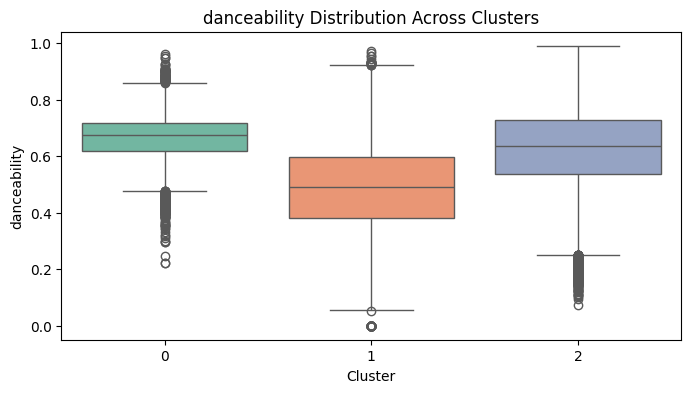

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


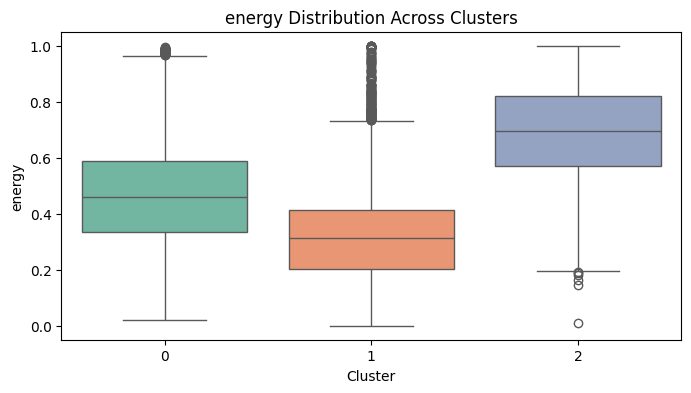

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


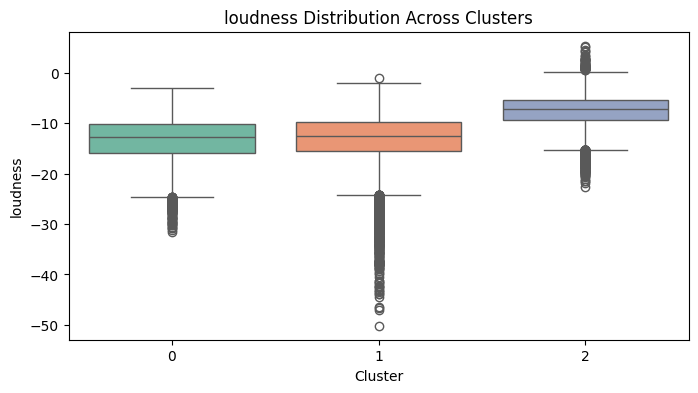

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


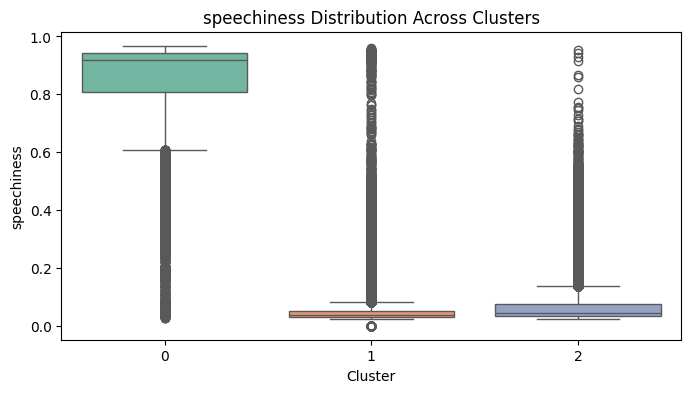

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


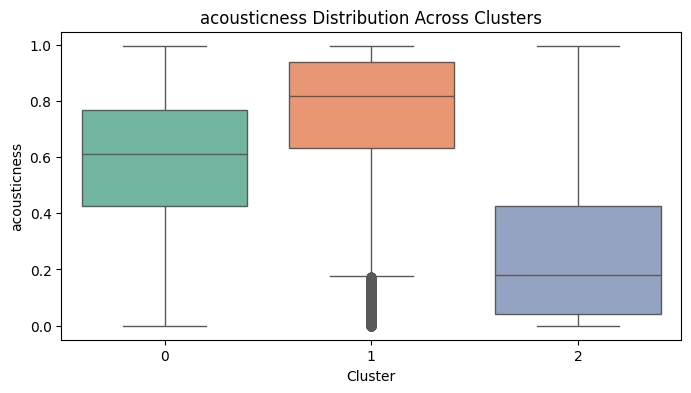

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


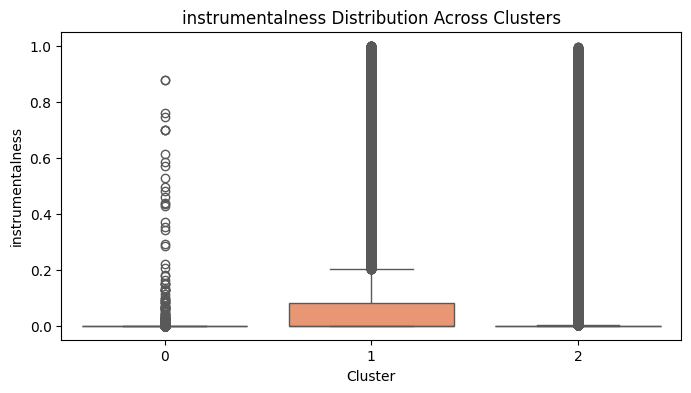

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


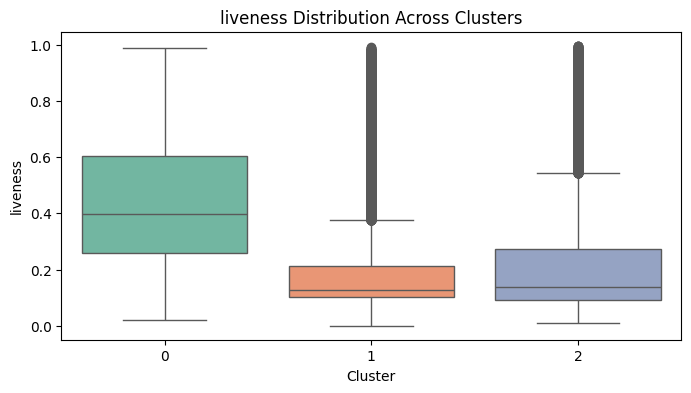

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


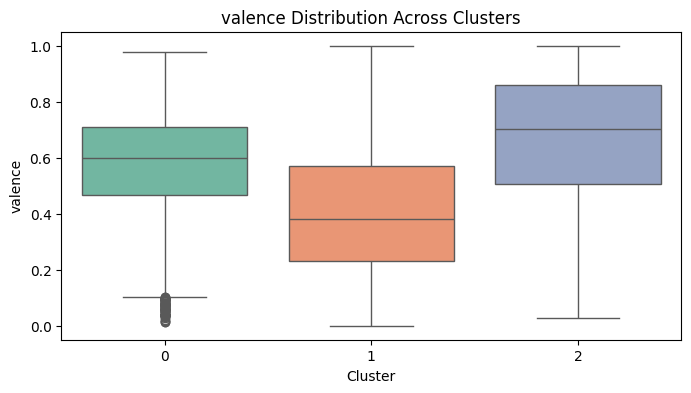

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


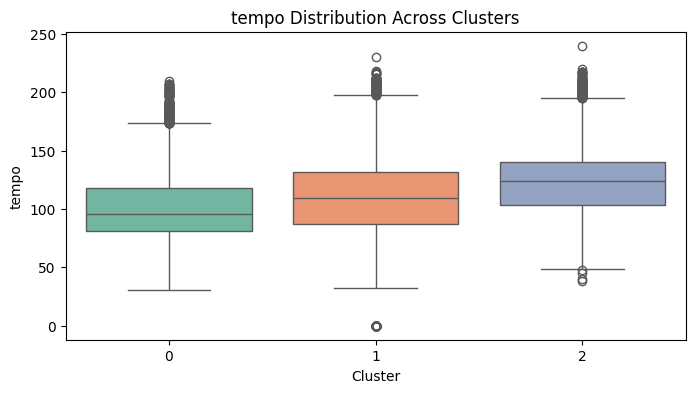

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15424\148676470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')


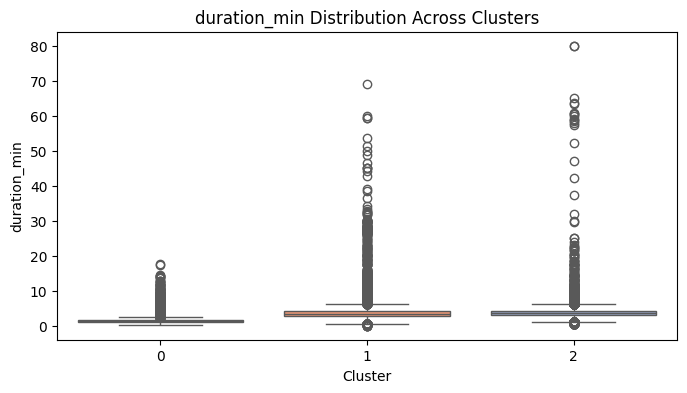

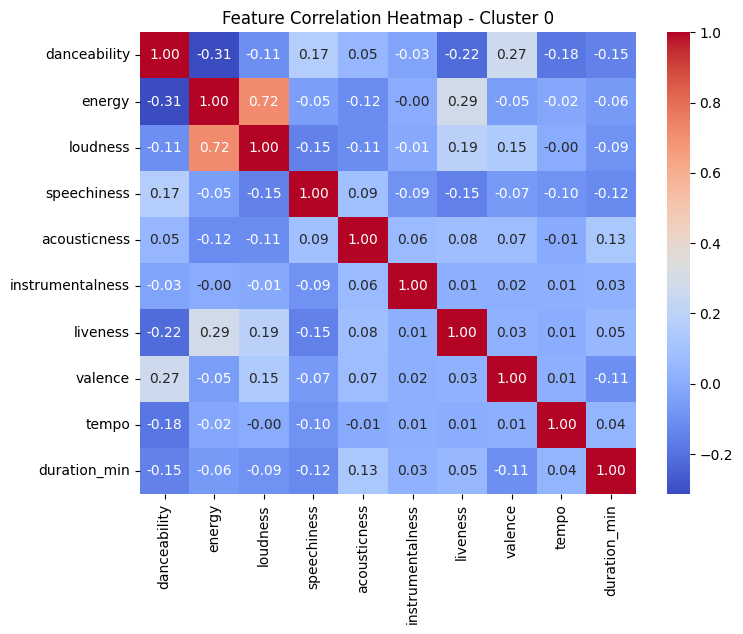

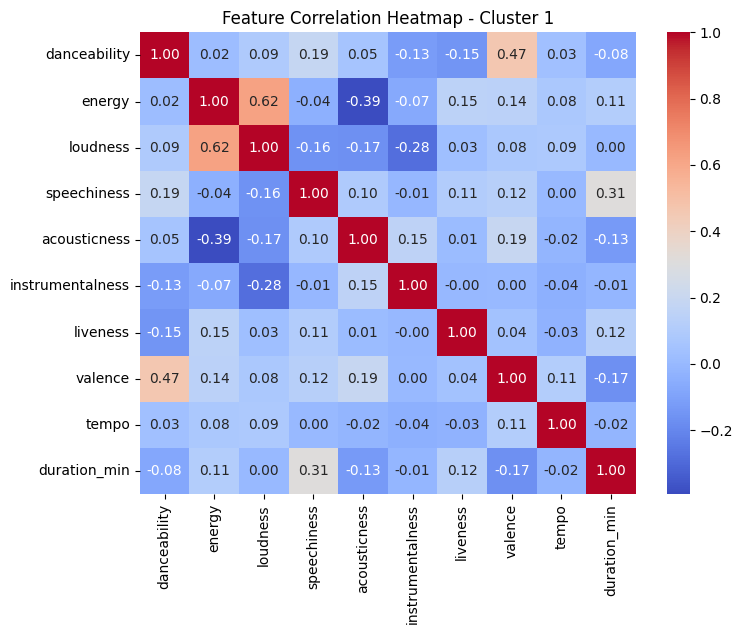

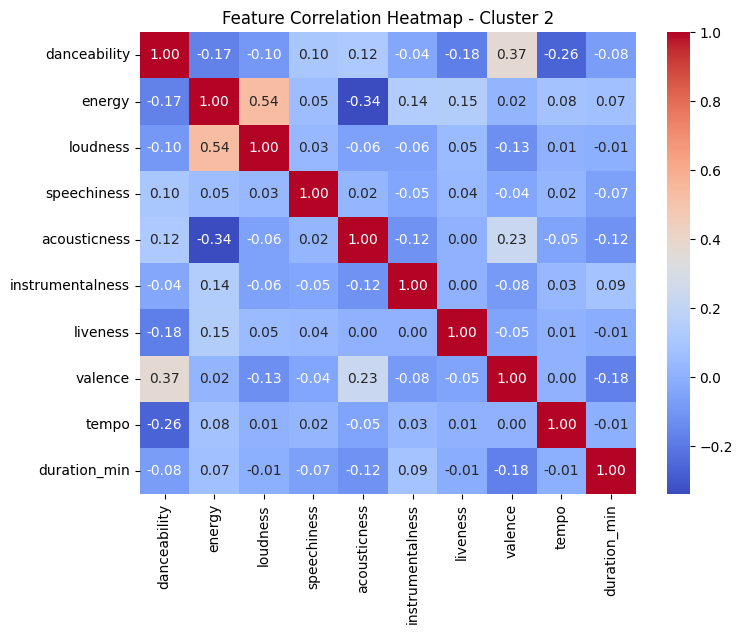


=== Cluster Interpretation Summary ===
   Cluster                               Song Type  \
0        0       🎤 Rap / Live / Spoken-Word Tracks   
1        1     🎶 Acoustic / Soft / Emotional Songs   
2        2  🎧 Energetic / Dance Pop / Happy Tracks   

                                         Description  
0  High speechiness, medium energy, high liveness...  
1  High acousticness, low energy & valence → chil...  
2  High energy, loudness, valence, and danceabili...  

✅ Cluster interpretation summary saved as 'cluster_interpretation_summary.csv'


In [22]:
#  Distribution plots for each feature by cluster
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=feature, data=df, palette='Set2')
    plt.title(f"{feature} Distribution Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.show()

#  Correlation Heatmap by Cluster
for c in sorted(df['cluster'].unique()):
    plt.figure(figsize=(8,6))
    subset = df[df['cluster'] == c][features]
    sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Feature Correlation Heatmap - Cluster {c}")
    plt.show()

# The final interpretation from the box plot 
cluster_interpretation = pd.DataFrame({
    "Cluster": [0, 1, 2],
    "Song Type": [
        "🎤 Rap / Live / Spoken-Word Tracks",
        "🎶 Acoustic / Soft / Emotional Songs",
        "🎧 Energetic / Dance Pop / Happy Tracks"
    ],
    "Description": [
        "High speechiness, medium energy, high liveness → resembles hip-hop, rap, or live talk-style songs.",
        "High acousticness, low energy & valence → chill, calm, or emotional tracks.",
        "High energy, loudness, valence, and danceability → upbeat pop, EDM, or workout music."
    ]
})
print("\n=== Cluster Interpretation Summary ===")
print(cluster_interpretation)
# save interpretation summary
cluster_interpretation.to_csv("cluster_interpretation_summary.csv", index=False)
print("\n✅ Cluster interpretation summary saved as 'cluster_interpretation_summary.csv'")

#### Final Summary

In [17]:
cluster_names = {
    0: "Energetic & Danceable",
    1: "Calm Acoustic",
    2: "Balanced Mainstream"
}
df['cluster_label'] = df['cluster'].map(cluster_names)

#  Cluster summary statistics
final_summary = (
    df.groupby(['cluster','cluster_label'])
      [features]
      .mean()
      .round(3)
      .reset_index()
)
print("\n=== Final Cluster Summary ===")
print(final_summary)

# Cluster sizes
cluster_sizes = df['cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

#  Export Final Outputs
df.to_csv("amazon_music_final_clusters.csv", index=False)
final_summary.to_csv("amazon_music_final_summary.csv", index=False)
print("\n✅ Files exported:")
print("  • amazon_music_final_clusters.csv — all songs with cluster labels")
print("  • amazon_music_final_summary.csv — cluster mean feature summary")

#  Quick insight report generation
print("\n🧠 Cluster Insights Summary:")
for _, row in final_summary.iterrows():
    c = int(row['cluster'])
    label = row['cluster_label']
    print(f"\nCluster {c} ({label}):")
    print(f"  🎵 Danceability={row['danceability']:.2f}, Energy={row['energy']:.2f}, "
          f"Acousticness={row['acousticness']:.2f}, Tempo={row['tempo']:.1f} BPM, Valence={row['valence']:.2f}")


=== Final Cluster Summary ===
   cluster          cluster_label  danceability  energy  loudness  \
0        0  Energetic & Danceable         0.664   0.467   -13.364   
1        1          Calm Acoustic         0.486   0.311   -13.204   
2        2    Balanced Mainstream         0.627   0.694    -7.606   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0        0.830         0.586             0.001     0.436    0.584  100.389   
1        0.060         0.749             0.169     0.182    0.413  111.941   
2        0.075         0.258             0.051     0.200    0.666  124.913   

   duration_min  
0         1.625  
1         3.728  
2         3.775  

Cluster Sizes:
cluster
0    12514
1    30815
2    52508
Name: count, dtype: int64

✅ Files exported:
  • amazon_music_final_clusters.csv — all songs with cluster labels
  • amazon_music_final_summary.csv — cluster mean feature summary

🧠 Cluster Insights Summary:

Cluster 0 (Energetic & Danceable):
  🎵 Da

#### Testings

In [18]:
# cluster_summary = df.groupby('cluster')[features].mean().reset_index()
# cluster_summary

In [19]:
# print(labels_kmeans)

In [20]:
# results_df

In [21]:
# df